<a href="https://colab.research.google.com/github/addaia/antibreaking/blob/main/plotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will be used to plot some of the data from the experiments

In [2]:
!pip install scienceplots

In [3]:
# imports
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import re
import scienceplots # type: ignore
plt.style.use('science')
# parameters for the science style -- too many
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.size": 16,
    "axes.labelsize": 16,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})


In [4]:
def parse_data(data_str):
    """
    robot output to lists to plot
    """
    x1 = []
    x2 = []
    for line in data_str.strip().splitlines():
        line = line.strip()
        if not line:
            continue
        parts = line.split()
        if len(parts) >= 2:
            x1.append(float(parts[0]))
            x2.append(float(parts[1]))
        else:
            print("Skipping line:", line)
    return x1, x2

## POS v TIME

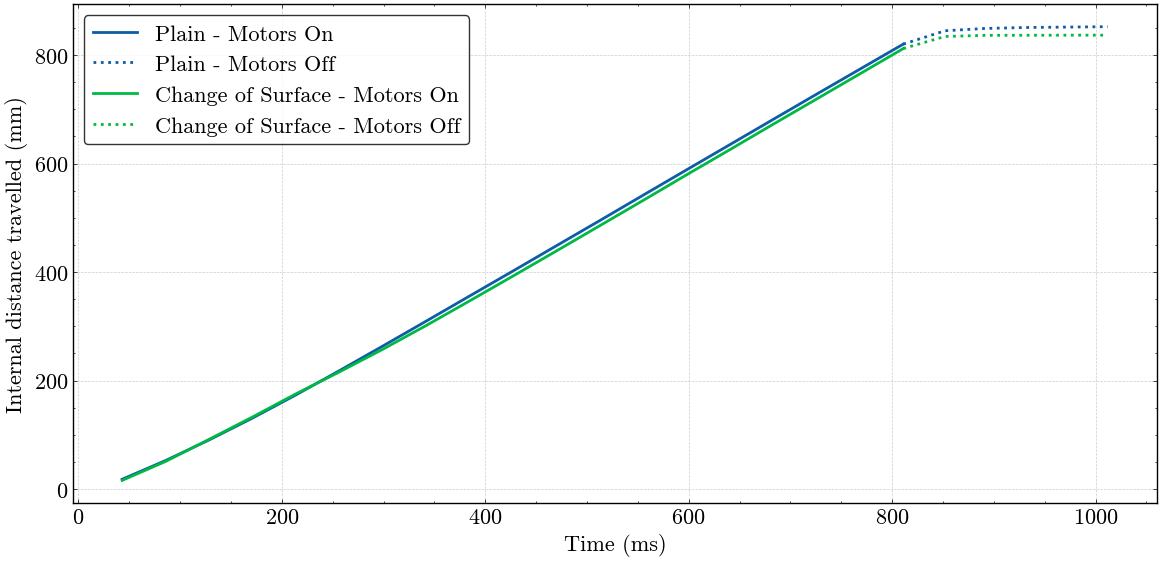

In [ ]:
data_str1 = """
43.00 18.04
86.00 52.78
128.00 90.07
171.00 130.67
214.00 173.68
256.00 217.59
299.00 263.30
342.00 309.61
384.00 355.18
427.00 401.64
470.00 448.55
512.00 494.25
555.00 541.46
598.00 588.50
640.00 634.33
683.00 681.33
726.00 728.17
768.00 773.66
811.00 820.19
852.00 844.81
891.00 849.01
931.00 850.82
972.00 851.57
1012.00 852.32
"""
data_str2 = """
43.00 15.94
86.00 51.13
128.00 91.12
171.00 132.63
214.00 175.63
256.00 215.33
299.00 257.44
342.00 301.49
384.00 346.15
427.00 392.32
470.00 438.93
512.00 484.77
555.00 531.81
598.00 579.29
640.00 625.09
683.00 672.38
726.00 719.22
768.00 765.01
811.00 812.03
852.00 834.26
891.00 836.36
932.00 836.51
972.00 836.66
1012.00 836.66
"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Internal distance travelled (mm)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# custom legend handles
handle_plain_on  = Line2D([0], [0], color=line1.get_color(), linestyle='-', linewidth=2)
handle_plain_off = Line2D([0], [0], color=line1.get_color(), linestyle=':', linewidth=2)
handle_cos_on    = Line2D([0], [0], color=line2.get_color(), linestyle='-', linewidth=2)
handle_cos_off   = Line2D([0], [0], color=line2.get_color(), linestyle=':', linewidth=2)

# legend
plt.legend(
    [handle_plain_on, handle_plain_off, handle_cos_on, handle_cos_off],
    ['Plain - Motors On', 'Plain - Motors Off',
     'Change of Surface - Motors On', 'Change of Surface - Motors Off']
)

plt.show()

## Acceleration vs time

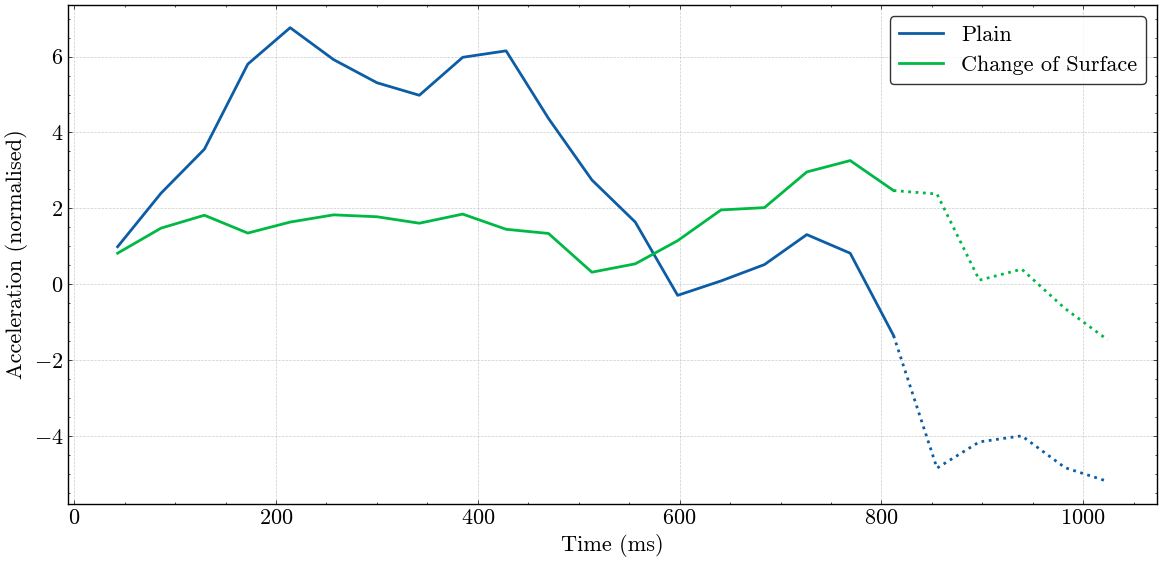

In [ ]:
data_str1 = """
43 0.99
86 2.40
129 3.56
172 5.80
214 6.76
257 5.92
300 5.31
342 4.98
385 5.98
428 6.15
470 4.37
513 2.75
556 1.64
598 -0.29
641 0.09
684 0.52
726 1.31
769 0.82
812 -1.35
855 -4.84
897 -4.15
939 -3.99
982 -4.83
1024 -5.19
"""
data_str2 = """
43 0.82
86 1.48
129 1.82
172 1.35
214 1.64
257 1.83
300 1.78
342 1.61
385 1.85
428 1.45
470 1.34
513 0.32
556 0.54
598 1.15
641 1.96
684 2.02
726 2.96
769 3.26
812 2.47
855 2.38
897 0.11
939 0.40
982 -0.64
1024 -1.46
"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




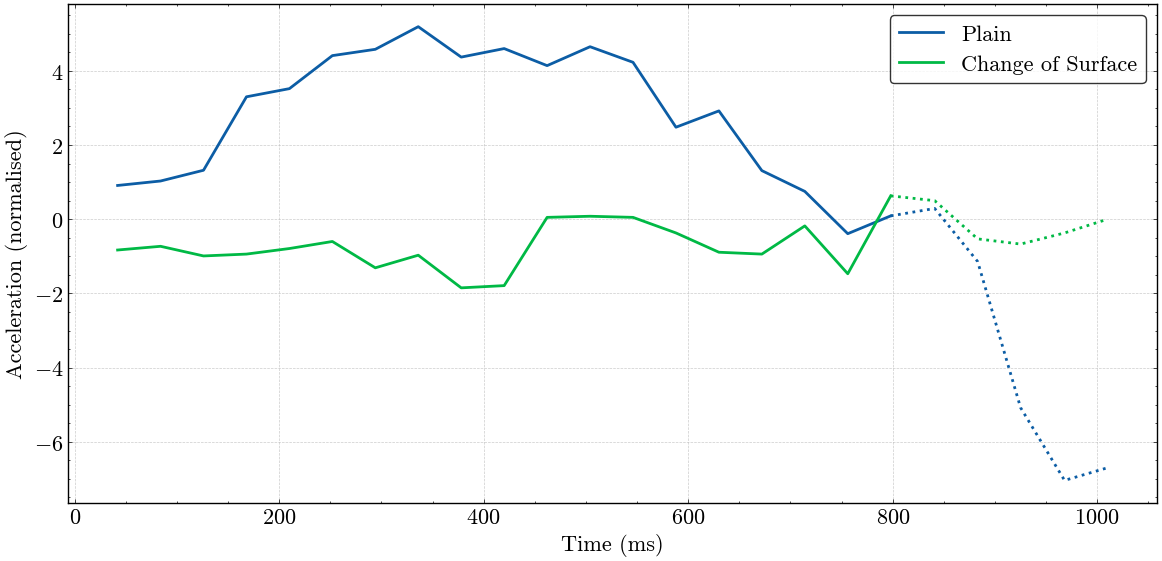

In [6]:
data_str1 = """
42 0.91
84 1.03
126 1.32
168 3.30
210 3.52
252 4.41
294 4.58
336 5.19
378 4.37
420 4.60
462 4.14
504 4.65
546 4.23
588 2.48
630 2.92
672 1.31
714 0.75
756 -0.39
798 0.09
841 0.29
883 -1.14
925 -5.08
968 -7.04
1010 -6.70

"""
data_str2 = """
42 -0.83
84 -0.73
126 -0.99
168 -0.94
210 -0.79
252 -0.60
294 -1.31
336 -0.97
378 -1.85
420 -1.79
462 0.05
504 0.08
546 0.05
588 -0.37
630 -0.89
672 -0.94
714 -0.18
756 -1.47
798 0.63
841 0.50
883 -0.53
925 -0.67
968 -0.37
1010 0.00

"""

# parse)
times1, acc1 = parse_data(data_str1)
times2, acc2 = parse_data(data_str2)

# split index
split_index1 = len(times1) - 6
split_index2 = len(times2) - 6

plt.figure(figsize=(12, 6))

# plain
line1, = plt.plot(times1[:split_index1+1], acc1[:split_index1+1], linestyle='-', linewidth=2, label='Plain')
plt.plot(times1[split_index1:], acc1[split_index1:], linestyle=':', linewidth=2, color=line1.get_color())

# CoS
line2, = plt.plot(times2[:split_index2+1], acc2[:split_index2+1], linestyle='-', linewidth=2, label='Change of Surface')
plt.plot(times2[split_index2:], acc2[split_index2:], linestyle=':', linewidth=2, color=line2.get_color())

plt.xlabel("Time (ms)")
plt.ylabel("Acceleration (normalised)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




box plot

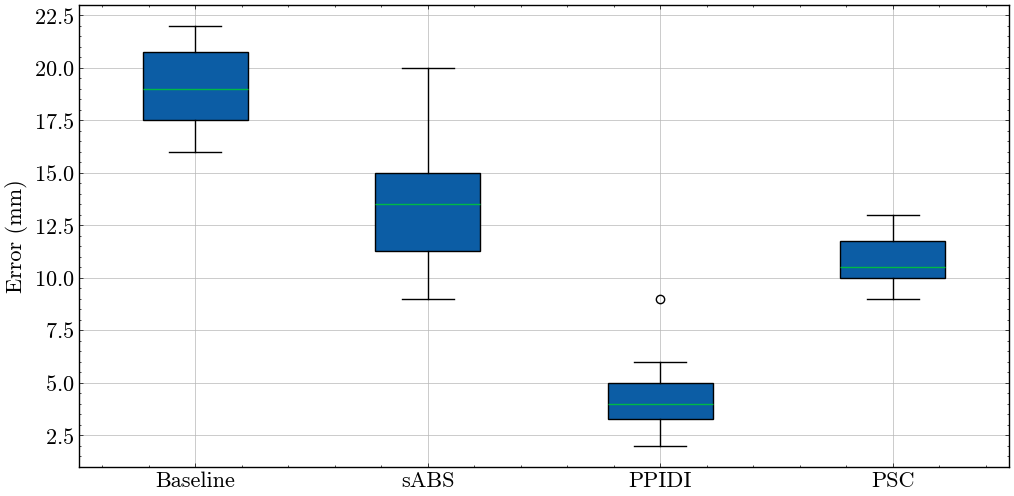

In [43]:


errors_baseline = [16, 19, 19, 19, 20, 21, 22, 21, 17, 17]
errors_sABS = [9, 20, 12, 15, 12, 11, 15, 15, 9, 15]
errors_PPIDI = [2, 4, 3, 5, 4, 9, 6, 2, 5, 4]
errors_PSC = [10, 11, 12, 9, 13, 10, 11, 10, 12, 9]
# combine
data = [errors_baseline, errors_sABS, errors_PPIDI, errors_PSC]

# boxplo
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True)


plt.xticks([1, 2, 3, 4], ['Baseline','sABS', 'PPIDI', 'PSC'])
plt.ylabel('Error (mm)')


plt.show()
